In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath('..'))

from scripts.data_procesing_for_model_building import data_load , drop_the_unwanted_data_column , see_for_missing_values , delete_duplicated_rows , one_hot_encoding , change_object_to_number  , lable_encoding, target_variable_and_features , train_test_split_selection , feature_scaling 

In [2]:
from scripts.models import model_building , define_parameter_grid_for_gridsearchcv , train_each_model_using_gridsearchcv  , train_each_model, model_evaluation

In [3]:
path = '../data/data.csv'

data = data_load(path)


c:\Users\bekib\Desktop\10ACADAMY\WEEK-THREE\week-3\scripts\data_procesing_for_model_building.py:12: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


In [4]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### i will drop the columns that i think have no relation on the model prediction 

In [5]:
# Columns to drop
columns_to_drop = ['UnderwrittenCoverID', 'PolicyID', 'NumberOfDoors', 
                   'VehicleIntroDate', 'IsVATRegistered', 'Title', 
                   'LegalType', 'Language']
data1 = drop_the_unwanted_data_column(data , columns_to_drop)

In [6]:
len(data1.columns)

44

In [7]:
see_for_missing_values(data1)

TransactionMonth            0
Citizenship                 0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
WrittenOff                  0
Rebuilt                     0
Converted                   0
CrossBorder                 0
NumberOfVehiclesInFleet     0
SumInsured                  0
TermFrequency               0
Calculated

In [8]:
data2 = delete_duplicated_rows(data1)

In [9]:
data2.shape

(857906, 44)

In [10]:
data2.dtypes

TransactionMonth             object
Citizenship                  object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
CustomValueEstimate         float64
AlarmImmobiliser             object
TrackingDevice               object
CapitalOutstanding           object
NewVehicle                   object
WrittenOff                   object
Rebuilt                     

In [11]:
numeric_cols = ['CapitalOutstanding', 'NumberOfVehiclesInFleet', 'ExcessSelected']
data3 = change_object_to_number(data2,numeric_cols)

In [12]:
label_encoding_columns = [
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
    'StatutoryClass', 'StatutoryRiskType', 'ExcessSelected','TransactionMonth', 'Citizenship', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 
    'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 
    'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
    'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 
    'NumberOfVehiclesInFleet', 'TermFrequency'
]
data4 = lable_encoding(data3,label_encoding_columns)

In [13]:
data4.head()

,TransactionMonth,Citizenship,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,17,0,3,1,2,2,0,2,1459,12,...,0,26,21,5,1,2,0,0,21.929825,0.0
1,19,0,3,1,2,2,0,2,1459,12,...,0,26,21,5,1,2,0,0,21.929825,0.0
2,21,0,3,1,2,2,0,2,1459,12,...,0,26,21,5,1,2,0,0,0.000000,0.0
3,19,0,3,1,2,2,0,2,1459,12,...,0,16,13,5,1,2,0,0,512.848070,0.0
4,21,0,3,1,2,2,0,2,1459,12,...,0,16,13,5,1,2,0,0,0.000000,0.0


In [14]:
# one_hot_columns = [
#     'TransactionMonth', 'Citizenship', 'Bank', 'AccountType', 'MaritalStatus', 
#     'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 
#     'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 
#     'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
#     'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 
#     'NumberOfVehiclesInFleet', 'TermFrequency'
# ]

# data5 = one_hot_encoding(data4 , one_hot_columns)
# data5.head()

In [15]:
X , y_claims = target_variable_and_features(data4)
y_claims.value_counts()

TotalClaims
0.000000        855131
6140.350877        326
750.649123         101
1300.000000         58
850.000000          50
                 ...  
6169.850877          1
34931.754386         1
22341.228070         1
33588.640351         1
16836.991228         1
Name: count, Length: 1602, dtype: int64

In [16]:
x_train , x_test ,  y_train_claims , y_test_claims  = train_test_split_selection(X,y_claims)

In [17]:
x_trian_scaled ,x_test_scaled = feature_scaling(x_train,x_test)

In [18]:
lr_model,dt_model,rfr_model,xgb_model = model_building()

In [19]:
lr_grid,dt_grid,rf_grid,xgb_grid = define_parameter_grid_for_gridsearchcv(lr_model,dt_model,rfr_model,xgb_model)

In [20]:
lr_model, dt_model, rfr_model, xgb_model = train_each_model(lr_model, dt_model, rfr_model, xgb_model, x_trian_scaled, y_train_claims)

finfish lr
finfish dt
finfish rfr
finfish xgb


In [21]:
# lr_grid,dt_grid,rf_grid,xgb_grid = train_each_model_using_gridsearchcv(lr_grid,dt_grid,rf_grid,xgb_grid,x_trian_scaled,y_train_claims)

In [22]:
mae , mse , r2 , y_pred = model_evaluation(lr_model,x_test,y_test_claims)

c:\Users\bekib\Desktop\10ACADAMY\WEEK-THREE\week-3\.week-3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
mae , mse , r2 , y_pred

(np.float64(3148265689.4457064),
 np.float64(1.0513002937569513e+19),
 -1510840920686.0356,
 array([-3.43419367e+09, -3.44156177e+09, -3.44166808e+09, ...,
        -3.44156742e+09, -3.44087772e+09, -2.88955086e+08]))

In [23]:
mae

np.float64(3148265689.4457064)

In [24]:
mse

np.float64(1.0513002937569513e+19)

In [25]:
r2

-1510840920686.0356

In [26]:
y_pred

array([-3.43419367e+09, -3.44156177e+09, -3.44166808e+09, ...,
       -3.44156742e+09, -3.44087772e+09, -2.88955086e+08])

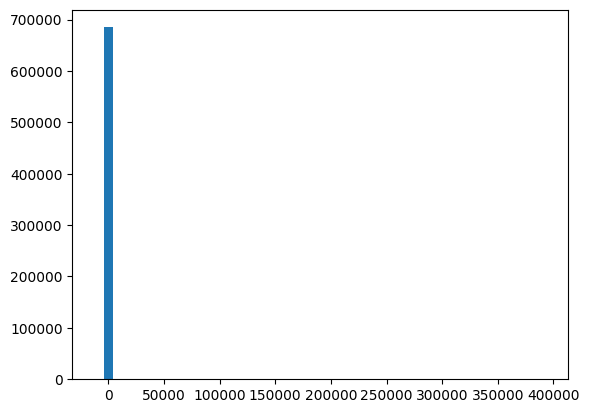

In [28]:
import matplotlib.pyplot as plt

plt.hist(y_train_claims, bins=50)
plt.show()

c:\Users\bekib\Desktop\10ACADAMY\WEEK-THREE\week-3\.week-3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


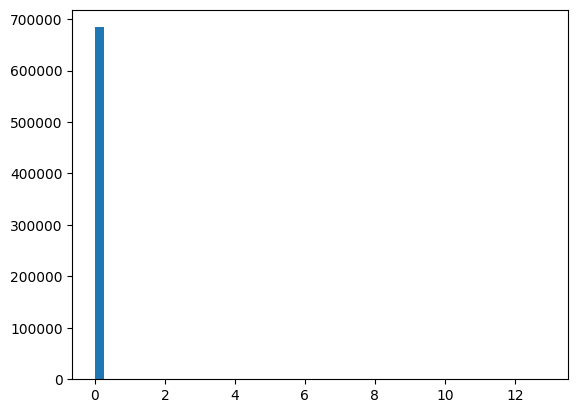

In [29]:
import numpy as np

y_train_claims_log = np.log1p(y_train_claims)  # Applies log(1 + x) to avoid issues with zeros
plt.hist(y_train_claims_log, bins=50)
plt.show()



In [30]:
zero_claims = (y_train_claims == 0).sum()
non_zero_claims = (y_train_claims != 0).sum()

print(f"Zero Claims: {zero_claims}")
print(f"Non-Zero Claims: {non_zero_claims}")


Zero Claims: 684126
Non-Zero Claims: 2198


In [31]:
mae , mse , r2 , y_pred = model_evaluation(dt_model,x_test,y_test_claims)

c:\Users\bekib\Desktop\10ACADAMY\WEEK-THREE\week-3\.week-3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [32]:
mae , mse , r2 , y_pred

(np.float64(33483.677189625654),
 np.float64(2749271947.9449778),
 -394.10238755935524,
 array([     0.        ,      0.        ,  43859.64912281, ...,
         43859.64912281, 119227.86087719,      0.        ]))

In [33]:
mae , mse , r2 , y_pred = model_evaluation(rfr_model, x_test,y_test_claims)

c:\Users\bekib\Desktop\10ACADAMY\WEEK-THREE\week-3\.week-3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [34]:
mae , mse , r2 , y_pred

(np.float64(23496.954504226447),
 np.float64(1357030105.2344203),
 -194.02102546414702,
 array([15712.67071404,   457.37201754, 27926.8781193 , ...,
        28892.02377719, 89617.50202632,   457.37201754]))

In [35]:
mae , mse , r2 , y_pred = model_evaluation(xgb_model,x_test,y_test_claims)

In [36]:
mae , mse , r2 , y_pred

(np.float64(51690.76758506285),
 np.float64(4794973661.512725),
 -688.093541060572,
 array([ 55454.523 ,  -4157.7646,  81945.56  , ...,  81945.56  ,
        141687.84  ,   2088.719 ], dtype=float32))